In [74]:
import numpy as np
import pandas as pd
import math
import ipywidgets
import matplotlib.pyplot as plt
import json
from pprint import pprint

from scipy.integrate import quad
from scipy.stats import multivariate_normal, norm

# An informal Introduction to the Gaussian Distribution

In this notebook, we provide a relatively informal introduction the concept of **probability distribution**. The significance of this subject lies in its foundational role across various disciplines (data science as well as scientic subjects such as physics or chemistry), where understanding the probability distribution shapes of data or phenomena under examination serves as a starting point for most applications. There are lots of mathematical details that could be covered when talking about probability distributions, since the subject is vast and can be discussed under different persepctives. The aim of this notebook is to provide just an introductory overview, but without compromising too heavily on the mathematical aspects. Specifically, after a brief introduction on general probability distributions, we will delve into one of the most important probability distribution, namely the so-called **normal or Gaussian Distribution**.  Additionally, we will include Python simulations to facilitate a better grasp of the concepts discussed.

## Probability Densities

In a *frequentistic* approach, we define the probability of an event as a measure of the frequency for the event to occur, in the limit that the total number of trials goes to infinity. For instance, the probabilty of rolling a dice and get "head" is $1/2$, since in the limit of an infinite number of trials, we should expect to get "head" half of the time and "tail" the other half. Such probabilities are defined over discrete sets of events, in the provided example $\{H, T\}$, i.e. "head" or "tail". However, most of the time we deal with continuous variables and we need to extend probabilities to such a continuous case. 

If $x$ is a real-value continuous variable, the *probability density* over $x$ is the defined as the quantity $p(x)$ such that $p(x)\delta x$ is the probability for $x$ to fall in the interval $(x, x+\delta x)$, in the limit $\delta x \to 0$. Then, we may define:

$$P(x \in (a, b)) = \int_a^b p(x) dx $$

which is the probability for $x$ to fall in the interval $(a, b)$. The probability density $p(x)$ must satisfy the following two conditions:
$$ \begin{gather}
p(x) \geq 0 \\
\int_{-\infty}^{+\infty} p(x) dx = 1
\end{gather}
$$
The sum and product rules, as well as Beyes' Theorem, apply equally to the case of probability densities. If $x$ and$y$ are two real variables, then the product and sum rules take the form:
$$\begin{gather}
p(x) = \int p(x,y) dy \\
p(x,y) = p(y|x) p(x)
\end{gather}
$$
where $p(y|x)$ is the *conditional probability* of y given x. 
In analogy with the discrete case, we may define the average value of some function $f(x)$, assuming that  $x$ follows the probability distributions $p(x)$, as:
$$
\mathbb{E}[f] = \int p(x) f(x) dx
$$
The operator $\mathbb{E}(\cdot)$ is generally known as the **expectation** (of $f(x)$). The **variance** of $f(x)$ is instead a quantity measuring the variability in $f(x)$ around its mean value $\mathbb{E}[f(x)]$ and is defined as:
$$
\text{var}[f] = \mathbb{E}[(f(x)-\mathbb{E}[f(x)])^2]
$$
in other words, it is the expectation value of the squared difference between $f(x)$ and its mean value. We take the *squared* difference since the expected value of the mere difference $f(x) - \mathbb{E}[f(x)]$ is identically vanishing. Calculating explictly the expected value and recalling that $\mathbb{E}$ is a *linear* operator, we can re-write the variance in a rather simple form: 
$$\begin{align}
\text{var}[f(x)] &= \mathbb{E}[f(x)^2 -2f(x)E[f(x)] + (\mathbb{E}[f(x)])^2] \\
&=\mathbb{E}[f(x)^2] - 2(\mathbb{E}[f(x)])^2+(\mathbb{E}[f(x)])^2 \\
&= \mathbb{E}[f(x)^2]-\mathbb{E}[f(x)]^2
\end{align}
$$
For two random variables $x$ and $y$ we define also the **covariance** as:
$$\begin{align}
\text{cov}[x,y] &= \mathbb{E}_{x,y}[\{x-\mathbb{E}[x]\}\{y-\mathbb{E}[y]\}] \\
&=\mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]
\end{align}
$$
which expresses the extent to which $x$ and $y$ vary together (i.e. "co-vary"). Indeed, if $x$ and $y$ are independent variables, then:
$$\begin{align}
\mathbb{E}_{x,y}[xy] &= \int \int xy p(x)p(y) dxdy \\
&= \left( \int x p(x) dx)\right) \left( \int y p(y) dy\right) \\
&= \mathbb{E}_x[x]\mathbb{E}_y[y]
\end{align}
$$
hence their covariance vanishes.

## The Gaussian Distribution

We start by discussing one of the most important probability distribution in maths and science in general, the so-called **normal** or **Gaussian distribution**. Let first consider the simplest case of a single real-valued variable $x$, for which the Gaussian distribution is defined as:
$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left({-\frac{1}{2\sigma^2}(x-\mu)^2}\right)
$$
The distribution is governed by two parameters: $\mu$, called the **mean**, and $\sigma^2$, called the **variance**. These names will be justified in the following. The square root of variance, i.e. $\sigma$, is called the **standard deviation**, while the reciprocal value of the variance is generally known as the **precision**, $\beta = 1/\sigma^2$.

In the cells below, we write a simple function to plot a Gaussian distribution to see how its shape change according to different values of mean and variance.

In [2]:
num_points = 1000
x_grid = np.linspace(-100, 100, num_points)

In [3]:
def generate_gaussian(x: np.array, mu: float, sigma: float) -> np.array:
    '''
    Function returning Gaussian distribution y values given:

    :params x: numpy array defining x values
    :params mu: float defining the mean
    :params sigma: float defining the variance
    '''
    a = 1/np.sqrt(2*np.pi*sigma**2)
    b = -1/(2*sigma**2)

    return a * np.exp(b*(x-mu)**2)

In [4]:
def plot_gaussian(mu: float , sigma: float):
    '''
    Function returning the plot of a Gaussian distribution given:

    :params mu: its mean
    :params sigma: its variance 
    '''

    y = generate_gaussian(x_grid, mu, sigma)

    # Plot histograms of sample means
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle('The Gaussian Distribution')

    ax.plot(x_grid, y, color='royalblue', linewidth=2)
    # Fill the area under the plot with light blue color
    ax.fill_between(x_grid, y, color='lightblue', alpha=0.2)

    # Plotting vertical lines at \mu+\sigma and \mu-\sigma
    ax.axvline(mu+sigma, linestyle="--", color="red", linewidth=2)
    ax.axvline(mu-sigma, linestyle="--", color="red", linewidth=2)
    
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\mathcal{N}(x|\mu, \sigma^2)$')
    ax.set_title(fr"Parameters: $\mu$ = {mu}, $\sigma$={round(sigma, 1)}")

    # Add grid lines
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
# Plotting Gaussian distrib
ipywidgets.interact(plot_gaussian, mu=(-20,20,0.5), sigma=(0.1, 50, 0.2))

interactive(children=(FloatSlider(value=0.0, description='mu', max=20.0, min=-20.0, step=0.5), FloatSlider(val…

<function __main__.plot_gaussian(mu: float, sigma: float)>

It is straightforward to show that the Gaussian distribution is normalized, as expected from a proper probability distribution:
$$
\int_{-\infty}^{+\infty} \mathcal{N} (x|\mu, \sigma^2) dx = \frac{1}{\sqrt{2\pi\sigma^2}}\cdot \sqrt{\frac{\pi}{\beta/2}} \equiv 1
$$
since $\int_{-\infty}^{+\infty} \exp{(-\alpha x^2)} = \sqrt{\pi/a}$. Let verify that the `generate_gaussian` function defined above actually defines a proper distribution, computing numerically its integral by means of the `scipy.quad` function:

In [6]:
# Define parameters
mu = 0
sigma = 1

# Integrate the Gaussian function from -infinity to +infinity
integral, _ = quad(generate_gaussian, -np.inf, np.inf, args=(mu, sigma))

In [7]:
print(f"The integral of the Gaussian distribution is: {integral}")

The integral of the Gaussian distribution is: 0.9999999999999997


Let now give a brief justification of the term *mean* and *variance*. We consider a real-value variable $x$ distributed according to a Gaussian distribution of mean $\mu$ and standard deviation $\sigma$. We can then compute the expectation value of $x$ under such Gaussian distribution as:
$$
\mathbb{E}[x] = \int_{-\infty}^{+\infty} \mathcal{N}(x | \mu, \sigma^2) x dx
$$
We could perform the integration analytically but we skip such simple but boring calculations here. Instead, let compute the integral using again the `quad` method from `scipy`. We perform the numerical integration for different pairs of $(\mu, \sigma)$ and look at the result:

In [8]:
def gaussian_expectation_integrand(x, mu, sigma):
    return x*generate_gaussian(x, mu, sigma)

In [9]:
# Define parameters
mu_values = [0, 1, 1.5, 2, 2.5, 5, 10.5]
sigma_values = [1, 1.5, 2, 2.5, 5, 10.5, 11]

params = list(zip(mu_values, sigma_values))

In [10]:
expectation_dict = {}
# Cycling over params and computing the expecation value
for i, param in enumerate(params):
    
    mu, sigma = param

    # Compute the Expectation value for given mean and standard devation
    expectation_value, _ = quad(gaussian_expectation_integrand, -np.inf, np.inf, args=(mu, sigma))

    expectation_dict[i] = {
        "mu": mu, 
        "sigma": sigma,
        "expectation": round(expectation_value, 2)
    }

In [11]:
pprint(expectation_dict)

{0: {'expectation': 0.0, 'mu': 0, 'sigma': 1},
 1: {'expectation': 1.0, 'mu': 1, 'sigma': 1.5},
 2: {'expectation': 1.5, 'mu': 1.5, 'sigma': 2},
 3: {'expectation': 2.0, 'mu': 2, 'sigma': 2.5},
 4: {'expectation': 2.5, 'mu': 2.5, 'sigma': 5},
 5: {'expectation': 5.0, 'mu': 5, 'sigma': 10.5},
 6: {'expectation': 10.5, 'mu': 10.5, 'sigma': 11}}


We can see that the expectation values, i.e. <span style="color: red;">the average values of $x$ under the given distribution, are always equal to the *mean* $\mu$ parameter of the Gaussian distribution</span>. That is why $\mu$ is referred to as the *mean of the Gaussian distribution*. In probability theory, $\mathbb{E}[x]$ is generally known as the **first order moment**. The **second-order moment** is defined as the expectation value of the square of $x$, i.e.:
$$
\mathbb{E}[x^2] = \int_{-\infty}^{+\infty} \mathcal{N}(x | \mu, \sigma^2) x^2 dx
$$
Computing again the integral numerically for a set of possibile $\mu$, $\sigma$ parameters, we find:

In [12]:
def gaussian_second_order_moment_integrand(x, mu, sigma):
    return (x**2)*generate_gaussian(x, mu, sigma)

In [13]:
# Cycling over params and computing the expecation value
for i, param in enumerate(params):
    
    mu, sigma = param

    # Compute the Expectation value for given mean and standard devation
    second_order_moment, _ = quad(gaussian_second_order_moment_integrand, -np.inf, np.inf, args=(mu, sigma))

    expectation_dict[i]["second-order-moment"] = round(second_order_moment, 2)

In [14]:
expectation_dict

{0: {'mu': 0, 'sigma': 1, 'expectation': 0.0, 'second-order-moment': 1.0},
 1: {'mu': 1, 'sigma': 1.5, 'expectation': 1.0, 'second-order-moment': 3.25},
 2: {'mu': 1.5, 'sigma': 2, 'expectation': 1.5, 'second-order-moment': 6.25},
 3: {'mu': 2, 'sigma': 2.5, 'expectation': 2.0, 'second-order-moment': 10.25},
 4: {'mu': 2.5, 'sigma': 5, 'expectation': 2.5, 'second-order-moment': 31.25},
 5: {'mu': 5,
  'sigma': 10.5,
  'expectation': 5.0,
  'second-order-moment': 135.25},
 6: {'mu': 10.5,
  'sigma': 11,
  'expectation': 10.5,
  'second-order-moment': 231.25}}

It may not be evident but one can actually verify that the second order moment is equal to $\mu^2+\sigma^2$ (the diligent reader can verify the result by computing the integration analytically. The integral can be solved in few steps applying the integration by part rule!). Therefore, we have:
$$\begin{gather}
\mathbb{E}[x] = \int_{-\infty}^{+\infty} \mathcal{N}(x | \mu, \sigma^2) x^2 dx = \mu \\
\mathbb{E}[x^2] = \int_{-\infty}^{+\infty} \mathcal{N}(x | \mu, \sigma^2) x^2 dx = \mu^2+\sigma^2
\end{gather}
$$
Then:
$$
\text{var}[x] = \mathbb{E}[x^2]-\mathbb{E}[x]^2 = \mu^2+\sigma^2-\mu^2 = \sigma^2
$$
hence $\sigma^2$ is called the *variance* of the Gaussian distribution.

## The Likelihood Function for the Gaussian Distribution

Let now suppose to have a set of observations of a real-valued variable $x$, i.e. $\boldsymbol{x} = (x_1, x_2, ..., x_N)^T$. We shall also suppose that each observation $x_i$ is drawn independently from a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, which are unknown to us. We consider the problem of determining the values of $\mu$ and $\sigma^2$ from the data set. First of all, we must pay attention to the statement that data points are <span style="color: red;"> drawn independently</span> from the distribution. Data points of this kind, which is sometimes abbreviated as **i.i.d** i.e. *independent and identically distributed*, allow us to write the probability of the data set in a rather simple and convenient form. Indeed, since the **joint** probability of two independent events is given by the product of the marginal probabilities for each event separately, we have:
$$
p(\boldsymbol{x}|\mu, \sigma^2) = \prod_{n=1}^N \mathcal{N}(x_n|\mu, \sigma^2)
$$
In other words, the probability of the data set $\boldsymbol{x}$ is the product of $N$ independent Gaussian distributions with mean $\mu$ and variance $\sigma^2$. When viewed as a function of such parameters, the above defined function is referred to as the **likelihood function for the Gaussian distribution**. 

In the so-called **maximum likelihood approach**, the problem translates into determining the values $\mu$ and $\sigma^2$ maximizing the likelihood function. It turns out that is much more convenient to maximize the $\ln$ of the likelihood function (remind that this is equivalent, since the $\log$ is a monotonically increasing function of its argument):
$$
\ln p(\boldsymbol{x}|\mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum_{n=1}^N (x_n -\mu)^2 -\frac{N}{2}\ln \sigma^2 - \frac{N}{2} ln(2\pi)
$$
Setting the derivative w.r.t. $\mu$ to 0, we find:
$$
\frac{\partial \ln p}{\partial \mu} = -\frac{1}{2\sigma^2}\cdot 2 \cdot \sum_{n=1}^N x_n - \frac{1}{2\sigma^2}\sum_{n=1}^N 2\mu = 0
$$
i.e.
$$
\mu_{ML} = \frac{1}{N} \sum_{n=1}^N x_n
$$
where the subscript $ML$ stands for "maximum-likelihood". The value $\mu_{ML}$ is the *sample mean*, i.e. the mean of the observed values $x_n$. Similarly, we can maximize w.r.t. $\sigma^2$, to find:
$$
\sigma_{ML}^2 = \frac{1}{N} \sum_{n=1}^N (x_n-\mu_{ML})^2
$$
which is referred to as the *sample variance*.

To some extent, we may say that the sample mean and the sample variance are best estimates for the true Gaussian distribution parameters in the maximum-likelihood approach. However, this approach has some limitations. Indeed, if we compute the expecation value of $\mu_{ML}$ and $\sigma^2_{ML}$ under the Gaussian distribution, we obtain:
$$
\begin{gather}
\mathbb{E}[\mu_{ML}] = \mu \\
\mathbb{E}[\sigma^2_{ML}] = \left(\frac{N-1}{N}\right)\sigma^2
\end{gather}
$$
Therefore, <span style="color: red;">the maximization of the likelihood function will give the right estimate for the mean but it will sistematically underestimate the true variance by a factor of $(N-1)/N$</span>. Such problem is known as **bias** and is related to a well known problem in Machine Learning called **over-fitting**. We note that in the limit:
$$
\lim_{N\to +\infty} \sigma^2_{ML} = \sigma^2
$$
therefore, the bias problem becomes less significant. In the following, we play a little bit with Python to see these concepts in action.

Let define a function to generate N data points drawn indpendent from a Gaussian distribution. We exploit the `numpy.random.normal`function:

In [15]:
def generate_univariate_gaussian_data(N: int, mu: float, sigma: float) -> np.array:
    # Generate N data points with one variable (x) distributed according to a Gaussian distribution
    return np.random.normal(mu, sigma, N)

To generate a "true" Gaussian distribution we use the function defined above. 

In [16]:
def plot_gaussian_data_vs_true_gaussian(N: int, mu: float):

    # We set the standard deviation to 1
    sigma=1.00
    
    # Drawn data points from a Gaussian distribution of known parameters
    data_points = generate_univariate_gaussian_data(N, mu, sigma)

    # Compute the sample mean of data points:
    sample_mean = round(np.mean(data_points), 2)
    sample_variance = round(np.mean((data_points-sample_mean)**2), 2)

    print(f"Δ(μ - μ(ML)) = {round(abs(mu - sample_mean), 2)}")
    print(f"Δ(σ² - σ²(ML)) = {round(abs(sigma**2 - sample_variance), 2)}")
    
    # Plot the data points distribution as well as the true underlying Gaussian Distribution
    fig, ax = plt.subplots(figsize=(8,6))

    # histogram of data pints
    ax.hist(data_points, density=True, color="royalblue", edgecolor="blue", alpha=0.35, label="Data Points")
    ax.axvline(x=sample_mean, color="red", linestyle="--", label="Sample Mean")

    # underlying Gaussian distribution
    x_values = np.linspace(min(data_points), max(data_points), 1000)
    ax.plot(x_values, generate_gaussian(x_values, mu, sigma), color="blue", label="Gaussian Distribution")
    ax.axvline(x=mu, color="darkorange", linestyle="--", label="True Mean")

    ax.set_title('Data Points drawn from Gaussian Distribution')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$p(x)$')

    ax.legend()
        
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
# Demonstrate Bias
ipywidgets.interact(plot_gaussian_data_vs_true_gaussian, N=(20, 2000, 1), mu=(-5,5,0.50))

interactive(children=(IntSlider(value=1010, description='N', max=2000, min=20), FloatSlider(value=0.0, descrip…

<function __main__.plot_gaussian_data_vs_true_gaussian(N: int, mu: float)>

Notice that above we are performing just a "single" experiment here, therefore the difference between the sample mean and the true mean may vary and be different from 0, especially from small $N$. 

## The Central Limit Theorem

The reason why the Gaussian distribution is so important and plays a central role in the whole probabily theory comes from the fact that it arises in many different contexts and can be motivated from a variety of perspectives. For instance, it can be showed that the Gaussian distribution is the probability distribution which maximizes the *entropy* of a single real variable (we will cover this topic in another Jupyter Notebook!). Here we would like to motivate the Gaussian distribution following a rather standard approach in probability theory, namely discussing the so-called **Central Limit Theorem**. Let state the theorem in its classical form:

**Lindeberg–Lévy Central Limit Theorem**: Suppose that $x_1, x_2, ..., x_N$ is a sequence of *independent and identically distributed* variables with expected value $\mathbb{E}[x_i] = \mu$ and variance $\text{var}[x_i] = \sigma^2$. Then, in the limit $N\to +\infty$, the distribution of the mean $(x_1+x_2+...x_N)/N$ converge to a *Gaussian distribution* of mean $\mu$ and variance $\sigma^2$:

$$
\bar{x}_N \to \mathcal{N}(\mu, \sigma^2)
$$

A mathematical proof of the theorem is out of the scope of the current notebook. However, in the following we write some code to see the central limit theorem in action. In particular, we define a number of samples of $N$ random number uniformly distributed in the interval $[0,1]$ and we plot the distribution of the sample means. We will see that increasing the number of random numbers $N$, the distribution of sample means will tend to a Gaussian distribution. 

We can generate $S$ samples, each of size $N$ with $N$ uniformly distributed numbers using the `numpy.random.rand`function. 

In [18]:
test_samples = np.random.rand(10, 2)

In [19]:
test_samples, test_samples.shape

(array([[0.69909579, 0.13099507],
        [0.04825022, 0.38727514],
        [0.21539499, 0.19073977],
        [0.8691551 , 0.42700885],
        [0.61587115, 0.44281817],
        [0.42161098, 0.34770437],
        [0.29479122, 0.58310261],
        [0.56161048, 0.08158249],
        [0.66269209, 0.16901203],
        [0.20054057, 0.95442419]]),
 (10, 2))

We see that `test_samples` is a 2D Numpy Array of shape (10, 2), i.e. 10 rows each of 2 columns. This represents 10 samples of 2 numbers. The sample means can be stored in a numpy array of shape (10,) and can be obtained computing means across the `axis=1`:

In [20]:
means = np.mean(test_samples, axis=1)
means, means.shape

(array([0.41504543, 0.21776268, 0.20306738, 0.64808197, 0.52934466,
        0.38465767, 0.43894692, 0.32159648, 0.41585206, 0.57748238]),
 (10,))

Let's wrap everything into a function that can be plotted interactively:

In [21]:
def central_limit_theorem_demo(N: int):
    # Fixing the number of samples to a large number
    n_samples = 10000

    # Computing sample means
    sample_means = np.mean(np.random.rand(n_samples, N), axis=1)

    # Plot histograms of sample means
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle('Central Limit Theorem Demonstration')

    ax.set_xlim([0,1])
    ax.hist(sample_means, bins=30, density=True, alpha=0.35, color='royalblue', edgecolor='blue')
    ax.set_title(f'Distribution of Sample Means (N = {N})')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')

    
    plt.tight_layout()
    plt.show()

In [22]:
# Demonstrate Central Limit Theorem
ipywidgets.interact(central_limit_theorem_demo, N=(1,50,1))

interactive(children=(IntSlider(value=25, description='N', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.central_limit_theorem_demo(N: int)>

## The Multivariate Gaussian Distribution

We can now extend the Gaussian distribution to the *multivariate* case, i.e. the case of a continuous variable $\boldsymbol{x}$ defined over a $D$ dimensional region. The distribution reads as:
$$
\mathcal{N}(\boldsymbol{x}, \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^(D/2)}\frac{1}{\det (\boldsymbol{\Sigma)}^{1/2}} \exp \left( -\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1} (\boldsymbol{x}-\boldsymbol{\mu})\right)
$$
where the mean $\boldsymbol{\mu}$ is now a $D$-dimensional vector, while the variance is a now a $D\times D$ dimensional matrix called the **covariance matrix**. The latter can be seen as a multi-dimensional extension of the standard $\sigma^2$ variance. Indeed, e.g. in the two-dimensional case (bivariate), this matrix will have a form like this:
$$
\boldsymbol{\Sigma} = \begin{pmatrix}
\sigma_{xx}^2 & \rho\sigma_{xy}\sigma_{yx} \\
\rho\sigma_{yx}\sigma_{xy} & \sigma_{yy}^2
\end{pmatrix}
$$
whre $\sigma_{ii}$ are variance along the $x$ and $y$ directions, $\sigma_{ij}$ is the covariance while $\rho$ is the *Pearson correlation coefficient*, a coefficient measuring the linear correlation between two variables. For a pair of random variables, the latter reads as:
$$
\rho = \frac{\mathbb{E}[(x-\mu_x)(y-\mu_y)]}{\sigma_x \sigma_y}
$$
In the following, let's focus on this bivariate case and plot the Gaussian distribution for different $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$. Note that the covariance matrix $\boldsymbol{\Sigma}$ can actually be taken to be **symmetric**, without loss of generality since any antisymmetric components would disappear from exponent.

In [55]:
def plot_bivariate_gaussian(mu_x: float, mu_y: float, sigma_xx: float, sigma_yy: float, sigma_xy: float):

    # Define mean and covariance
    mu = np.array([mu_x, mu_y])
    cov = np.array([[sigma_xx, sigma_xy], 
                    [sigma_xy, sigma_yy]]
                  )

    # Sampling from multivariante with Numpy
    samples = np.random.multivariate_normal(mu, cov, 1000)

    # Create a two dimensional grid with np.meshgrid
    x_grid, y_grid = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    # define a 100x100x2 array: 100x100 points each with two coordintates, x, y
    pos = np.empty(x.shape+(2,))
    pos[:,:,0] = x_grid
    pos[:,:,1] = y_grid

    # Evaluate the bivariate normal probability density function at each point of the grid
    bivariate_pdf = multivariate_normal(mu, cov).pdf(pos)

    # Plot:
    fig, ax = plt.subplots(figsize=(8, 8))
    # Plot the contour of the multivariate Gaussian distribution
    plt.contour(x, y, bivariate_pdf, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour of Multivariate Gaussian Distribution')
    
    # Scatter plot the generated samples
    plt.scatter(samples[:, 0], samples[:, 1], color='red', alpha=0.5, label='Samples')
    plt.legend()
    
    plt.colorbar(label='Probability Density')
    plt.grid(True)
    plt.show()

<div style="background-color: #f0f8ff; border: 1px solid #1e90ff; border-radius: 5px; padding: 10px;">
    <b style="color: #1e90ff;">Warning:</b> For some variance and covariance values, the covariance matrix may not be positive definite, leading to singular values!  
</div>


In [59]:
# Demonstrate Central Limit Theorem
ipywidgets.interact(plot_bivariate_gaussian, 
                    mu_x=(-2,2, 0.5), mu_y=(-2,2, 0.5), 
                    sigma_xx=(0.1, 2, 0.1), sigma_yy=(0.1, 2, 0.1),
                    sigma_xy = (0, 0.9, 0.1)
                   )

interactive(children=(FloatSlider(value=0.0, description='mu_x', max=2.0, min=-2.0, step=0.5), FloatSlider(val…

<function __main__.plot_bivariate_gaussian(mu_x: float, mu_y: float, sigma_xx: float, sigma_yy: float, sigma_xy: float)>

Let analyze the multivariate Gaussian in more details. First of all, we note that the distribution has a functional dependence on the quantity:
$$
\Delta^2 = (\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})
$$
its square root $\Delta$ is called the **Mahalanobis distance** and one can prove that such distance reduces to the standard Euclidean distance when the covariance matrix is the identity matrix. Now, consider the following eigenvalue-eigenvalue equation:
$$
\boldsymbol{\Sigma}\boldsymbol{U} = \lambda \boldsymbol{U}
$$
From linear algebra we known that, since the covariance is a real, symmetric matrix, its eigenvalues are real and its eigenvectors can be chosen to form an orthonormal basis:
$$
\boldsymbol{u}_i^T\boldsymbol{u}_j = \boldsymbol{I}_{ij}
$$
where $\boldsymbol{u}_i$ is the $i$-th eigenvector and $\boldsymbol{I}$ is the identity matrix. Therefore, we may write the covariance matrix as follows:
$$
\boldsymbol{\Sigma} = \sum_i \lambda_i \boldsymbol{u}_i \boldsymbol{u}_i^T
$$
and similarly, the inverse:
$$
\boldsymbol{\Sigma}^{-1} = \sum_i \frac{1}{\lambda_i} \boldsymbol{u}_i \boldsymbol{u}_i^T
$$
Substituing this expansion into the square of the Mahalanobis distance, we find:
$$
\begin{align}
\Delta^2 &= \sum_i \frac{1}{\lambda_i}(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{u}_i \boldsymbol{u}_i^T(\boldsymbol{x}-\boldsymbol{\mu}) \\
&=\sum_i \frac{1}{\lambda_i} (\boldsymbol{u}_i^T(\boldsymbol{x}-\boldsymbol{\mu}))^T (\boldsymbol{u}_i^T(\boldsymbol{x}-\boldsymbol{\mu}))\\
&= \sum_i \frac{y_i^2}{\lambda_i}
\end{align}
$$
where $y_i = \boldsymbol{u}_i^T(\boldsymbol{x}-\boldsymbol{\mu})$. This equation has a very interesting interpretation: $y_i$ can be regared as a new coordinate system, shifter w.r.t to the original system by the mean and rotated by a matrix formed by the eigenvectors of the covariance matrix. The $\boldsymbol{U}$ matrix can be indeed regared as a rotation matrix, being *unitary*, i.e. $\boldsymbol{U}\boldsymbol{U}^T = \boldsymbol{U}^T\boldsymbol{U}= \boldsymbol{I}$. 
We shall then write the original multivariate Gaussian distribution in this new coordinate system. In passing from the $\boldsymbol{x}$ to the $\boldsymbol{y}$ coordinate system, we have a Jacobian matrix given by:
$$
J_{ij} = \frac{\partial x_i}{\partial y_j} = U_{ij}
$$ 
but since $\boldsymbol{U}$ is unitary, $|\boldsymbol{J}|^2 = |\boldsymbol{U}^T\boldsymbol{U}| = 1$. Similarly, the determinant of the covariant matrix can be substitued by the determinant of the decomposed matrix, i.e.
$$
\det(\boldsymbol{U}^T\boldsymbol{\Sigma}\boldsymbol{U}) = \prod_j \lambda_j
$$
(NB: the decomposed matrix will be *diagonal*). Therefore, we can finally write:
$$
p(\boldsymbol{y}) = p(\boldsymbol{x})|\boldsymbol{J}| = \prod_j \frac{1}{(2\pi\lambda_j)^{1/2}} \exp \left( -\frac{y_j^2}{2\lambda_j}\right)
$$
In other words, <span style="color: red;"> the multivariate Gaussian has been re-written in the product of $D$ independent univariate Gaussian distributions, with variances given by the eigenvalues of the original covariance matrix.</span>

Let try to verify such properties with a Python simulation on a simple bivariate case:

In [120]:
# Let fix the mean and covariance matrix 
mu = np.array([0,0])
cov = np.array([[1, 0.5],
               [0.5, 1]]
              )

In [121]:
# let compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [122]:
# we actually see that:
eigenvectors.shape

(2, 2)

In [123]:
# the decomposed matrix is the diagonal matrix whose elements are the eigenvalues 
eigenvectors.T@cov@eigenvectors, eigenvalue

(array([[1.50000000e+00, 2.22044605e-16],
        [1.66533454e-16, 5.00000000e-01]]),
 array([1.5, 0.5]))

In [184]:
# Our transformation matrix is the eigenvectors matrix:
U = eigenvectors

In [185]:
# let now generate a sample, drawing from the multivariate Gaussian distribution
num_samples = 10000
original_samples = np.random.multivariate_normal(mu, cov, num_samples)

In [186]:
# Let now transform the sample
transf_samples = np.dot(original_samples-mu, U)

In [187]:
# check the size
original_samples.shape, transf_samples.shape

((10000, 2), (10000, 2))

In [188]:
# Let now calculate the variance along x and y of the transformed sample
transf_sigma_x = np.var(transf_samples[:, 0])
transf_sigma_y = np.var(transf_samples[:, 1])

In [189]:
# Let compare with the eigenvalues:
print("Variance along new transformed coordinate 1 (x):", transf_sigma_x)
print("Variance along new transformed coordinate 2 (y):", transf_sigma_y)
print("Eigenvalues of the covariance matrix:", eigenvalues)

Variance along new transformed coordinate 1 (x): 1.5060990852179614
Variance along new transformed coordinate 2 (y): 0.49700140999951264
Eigenvalues of the covariance matrix: [1.5 0.5]


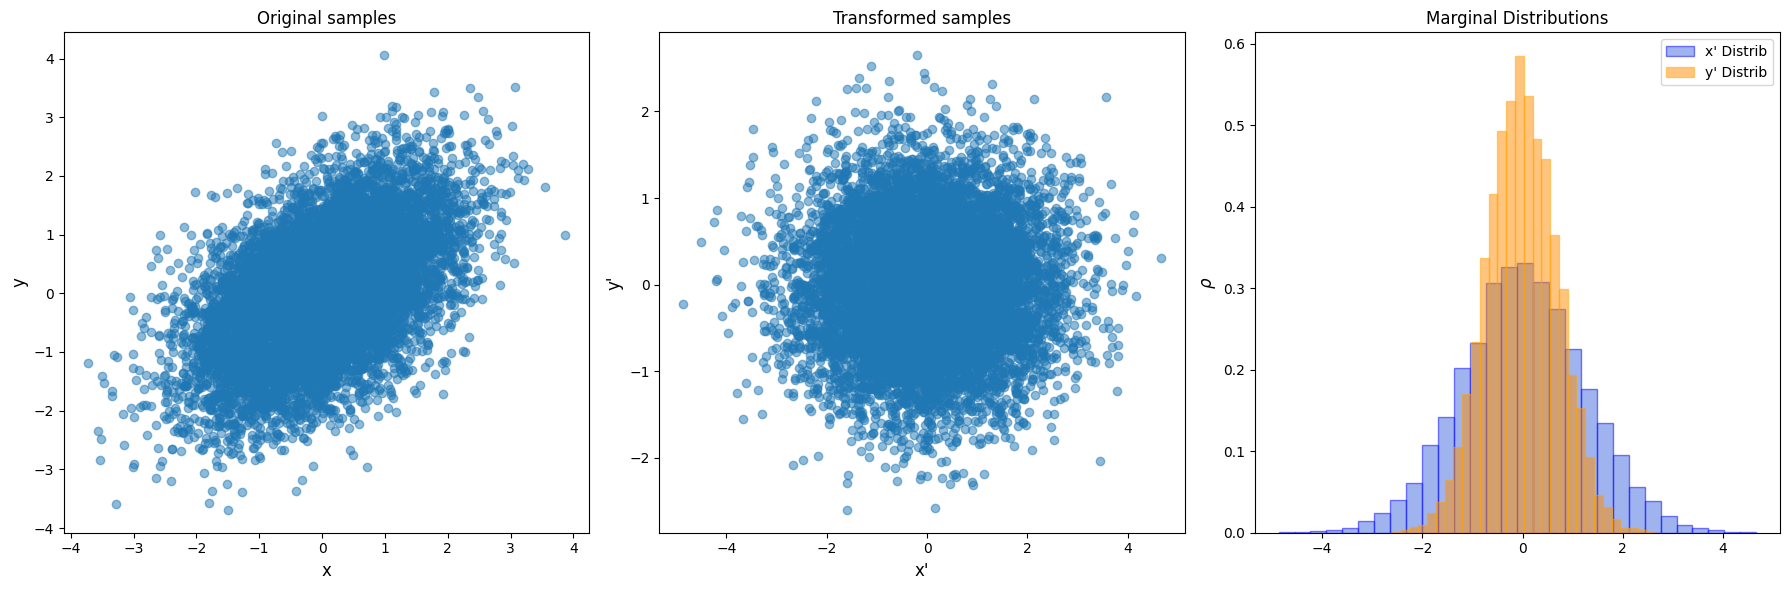

In [196]:
# Now, let's plot the original and transformed samples along with the new indipendent distributions:
# Plot all three plots: original samples, transformed samples, and histograms of the marginal distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot original samples
ax[0].scatter(original_samples[:, 0], original_samples[:, 1], alpha=0.5, label='Original Samples')
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_title('Original samples', fontsize=12)

# Plot transformed samples
ax[1].scatter(transf_samples[:, 0], transf_samples[:, 1], alpha=0.5, label='Transformed Samples')
ax[1].set_xlabel("x'", fontsize=12)
ax[1].set_ylabel("y'", fontsize=12)
ax[1].set_title('Transformed samples', fontsize=12)

# Plot histograms of the marginal distributions
ax[2].hist(transf_samples[:, 0], bins=30, alpha=0.5, color="royalblue", edgecolor="blue", density=True, label="x' Distrib")
ax[2].hist(transf_samples[:, 1], bins=30, alpha=0.5, color="darkorange", edgecolor="orange", density=True, label="y' Distrib")
ax[2].set_ylabel(r'$\rho$', fontsize=12)
ax[2].set_title('Marginal Distributions', fontsize=12)
ax[2].legend()

plt.tight_layout()
plt.show()